# Wordcloud

Word cloud is a visual representation of text data that can be shown for example in a shape of a cloud. The words in the cloud are typically represented in different colors and font-sizes. See an example of a word cloud below! 

![cloud](../images/opendata-cloud.png)

In this exercise we are going to create a word cloud of our own. We are going to use ice cream stall reviews from Helsinki area as our data that we want to display. The aim is to:

- Read the review data from a file
- Clean the data such that it contains no stop words
- Display the data in a word cloud that has a form of an ice cream

Let's get to work!

## Importing the review data

We begin by importing the data we need. The data is available on a csv-file called "icecream_stall_reviews.csv". It is a collection of ice cream stall reviews that have been [scraped](https://en.wikipedia.org/wiki/Web_scraping) from [foursquare.com](https://foursquare.com/explore?mode=url&near=Helsinki&nearGeoId=72057594038586161&q=Ice%20cream). To read it, we can use a python-library called [pandas](https://pandas.pydata.org/). The function [`read_csv()`]() can do the job for us if we know the path to the data file. The file is in the same directory as this notebook-file so we can use the name of the file as it is.

In [1]:
import pandas as pd

# Save the table to variable 'data'
data = pd.read_csv('../data/icecream_stall_reviews.csv')

# Let's read the first few lines of the file
data.head()

,Unnamed: 0,Title,Reviews,Ratings
0,0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.1
1,1,Bus Gelato,Great Service good coffee and excellent artesa...,8.7
2,2,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,8.0
3,3,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8
4,4,Fazer Café,I have been coming here for many years great c...,8.2


## Cleaning the data

It seems that our data consists of the name of the stall, review-text and a rating number. Our next task is to extract the review-texts from the table, tokenize them and then clean them. We have done similar task already on a previous exercise where we studied Shakespeare's Hamlet. Let's do the cleaning this time using some efficient [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) and [lambda](https://docs.python.org/3/reference/expressions.html#lambda)-expressions. Don't worry if these look too overwhelming, these are just a way to do things quicker.

Let's get to work!

In [2]:
# Make a new column "review_lowercase" that contains the review texts with all letters being lowercase.
data['review_lowercase'] = data['Reviews'].apply(lambda x:" ".join(word.lower() for word in x.split()))

# Make a new column "review_nopunct" that contains the review texts with non-words and non-letters removed.
data['review_nopunct'] = data['review_lowercase'].str.replace('[^\w\s]','') #Removes non words and letters

# Make a new column "review_nostopwords" that contains the review texts with stop words removed.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['review_nostopword'] = data['review_nopunct'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# See how the data looks like
data.head()

,Unnamed: 0,Title,Reviews,Ratings,review_lowercase,review_nopunct,review_nostopword
0,0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.1,chili chocolate flavour to burn you and matcha...,chili chocolate flavour to burn you and matcha...,chili chocolate flavour burn matcha tea flavou...
1,1,Bus Gelato,Great Service good coffee and excellent artesa...,8.7,great service good coffee and excellent artesa...,great service good coffee and excellent artesa...,great service good coffee excellent artesan ic...
2,2,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,8.0,great ice cream. comes at a price though,great ice cream comes at a price though,great ice cream comes price though
3,3,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8,best ice cream by the biggest scoops i've trie...,best ice cream by the biggest scoops ive tried...,best ice cream biggest scoops ive tried town
4,4,Fazer Café,I have been coming here for many years great c...,8.2,i have been coming here for many years great c...,i have been coming here for many years great c...,coming many years great coffee food ice cream


## Making the cloud

Now we have a cleaned set of review-data to be displayed on our word cloud! To be able to do this, we need to import [wordcloud](https://amueller.github.io/word_cloud/)-package and [matplotlib](https://matplotlib.org/)-package for plotting. We also need to transform our list of reviews to a single text-string. The classes and functions we need in this sections are:

- [`WordCloud`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)
- [`generate()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)
- [`to_string()`](https://www.geeksforgeeks.org/python-pandas-series-to_string/)
- [`imshow()`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html)

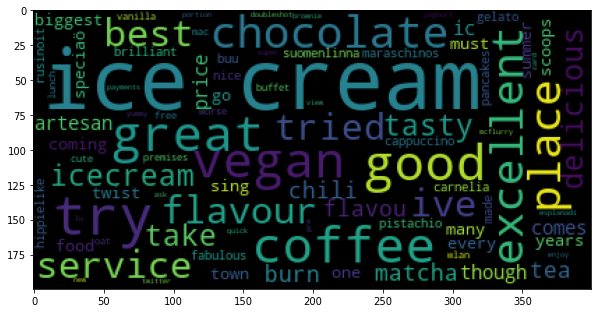

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the review column from data-table as single string.
data_string = data['review_nostopword'].to_string()

# Create a WordCloud object with a spesified size.
wordcloud = WordCloud()

# Generate the words to cloud from our data string
wordcloud.generate(data_string)

# Initialize the figure
plt.figure (figsize = (10,10))

# Show the word cloud
plt.imshow(wordcloud)

# Show the figure
plt.show()

Great! We see a wordcloud from our reviews now. However, there are still some extra words that perhaps we would not like to include in our cloud such as 'ice', 'cream', 'ive', 'take', 'tried' and 'try'. These were not included in the stop words we used. We can include them manually, though.

In [4]:
# Make a new column "review_cleaned" that contains the review texts with additional stop words removed.
other_stopwords = ['ice','cream','ive','take','tried','try']
data['review_cleaned'] = data['review_nostopword'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stopwords))

# See how the data looks like now
data.head()

,Unnamed: 0,Title,Reviews,Ratings,review_lowercase,review_nopunct,review_nostopword,review_cleaned
0,0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.1,chili chocolate flavour to burn you and matcha...,chili chocolate flavour to burn you and matcha...,chili chocolate flavour burn matcha tea flavou...,chili chocolate flavour burn matcha tea flavou...
1,1,Bus Gelato,Great Service good coffee and excellent artesa...,8.7,great service good coffee and excellent artesa...,great service good coffee and excellent artesa...,great service good coffee excellent artesan ic...,great service good coffee excellent artesan ic...
2,2,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,8.0,great ice cream. comes at a price though,great ice cream comes at a price though,great ice cream comes price though,great comes price though
3,3,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8,best ice cream by the biggest scoops i've trie...,best ice cream by the biggest scoops ive tried...,best ice cream biggest scoops ive tried town,best biggest scoops town
4,4,Fazer Café,I have been coming here for many years great c...,8.2,i have been coming here for many years great c...,i have been coming here for many years great c...,coming many years great coffee food ice cream,coming many years great coffee food


Remember that we also wanted to display the words in a shape of an ice cream. For this, we need an image of an ice cream to be used as a mask. The area we want our words to be in should be black in the image and the backgbround should be white. Therefore, we need a black icecream on a white background. This kind of image can be found in the file called "icecream.png". To open the image in python, we first need to use a module called [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html) from [PIL](https://pillow.readthedocs.io/en/stable/index.html)-package and then transform it into an RGB-array using [`array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) from [numpy](https://numpy.org/)-package.

In [5]:
import numpy as np
from PIL import Image

# Open the image file
image = Image.open('../images/icecream.png')

# Transform the image into an RGB array
icecream_mask = np.array(image)

Now we can make the word cloud by a similar manner as before, but adding some additional parameters to the WordCloud-object. Check the cell before for details!

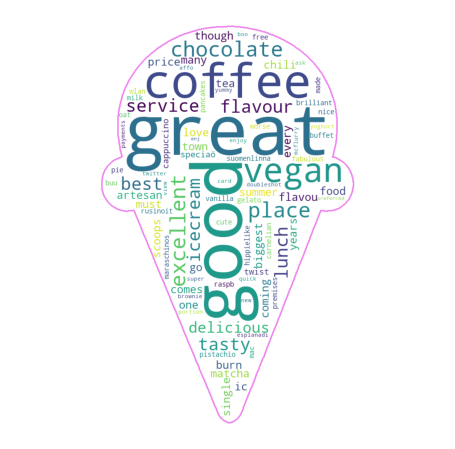

In [6]:
# Get the cleaned review column from data-table as single string.
data_string = data['review_cleaned'].to_string()

# Make a WordCloud-object with specified mask, background color, contour width and contour color
wordcloud = WordCloud(mask = icecream_mask, background_color='white', contour_width=3, contour_color='violet')

# Generate the words to cloud from our data string
wordcloud.generate(data_string)

# Plot the figure, optionally ignore the axis.
plt.figure (figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

That's it! We've created a cool, ice cream -shaped wordcloud from ice cream stall reviews! Now, try to make a word cloud yourself from some other set of words! You can even try to create your own mask for the figure.

Happy coding!

<div class="alert alert-block alert-info">
<b>Note</b> 

If you want to define the weight of each word as a number instead of it's frequency in a text, you can generate the cloud using [`generate_from_frequencies()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)-method. You just need to pass a dictionary as a parameter. For example you could write

```python
words = {"Dog":10, "Cat": 5, "Cow":5, "Platypus":3}
wordcloud.generate(words)
```

This would result in a cloud, where the word "Dog" would be the largest and "Platypus" the smallest.

You can save your image by writing

```python
plt.savefig("filename.png")
```

